In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Visualize the dataset

Target labels:  [8 7 0 1 0 7 9 0 1 1]


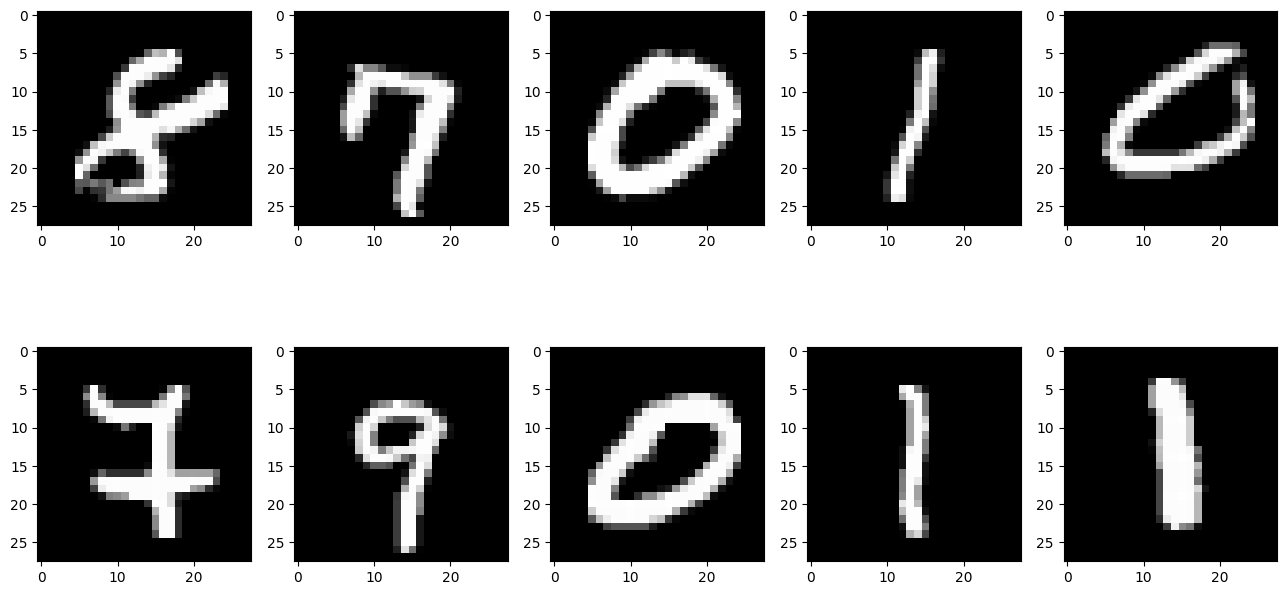

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [5]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [7]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8436 - loss: 0.5106
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9582 - loss: 0.1361
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9706 - loss: 0.0951
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9762 - loss: 0.0726
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9808 - loss: 0.0615
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9829 - loss: 0.0522
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9863 - loss: 0.0437
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9883 - loss: 0.0348
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9900 - loss: 0.0313
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9915 - loss: 0.0268


Plot the loss and accuracy graphs

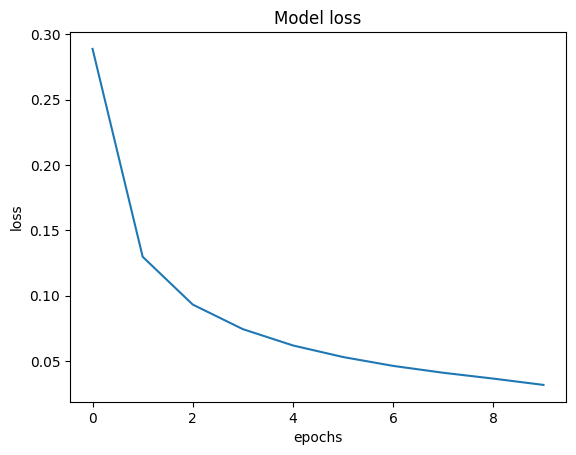

In [8]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

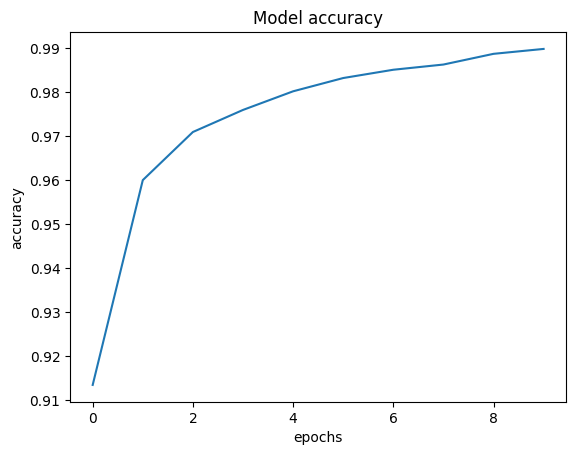

In [9]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [10]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9744 - loss: 0.0942
Loss of the Test dataset is: 0.08390867710113525
Accuracy of the test dataset is: 0.9781000018119812


Save the model weights

In [13]:
model.save_weights("MNIST_WEIGHTS_V1.weights.h5")


In [14]:
pip install tensorflow

In [24]:
# Hyperparameter variant: deeper/wider, dropout, and more epochs
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

# Rebuild a stronger baseline model
hp_model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

hp_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])

hp_info = hp_model.fit(new_train_data, new_train_target, validation_split=0.1, epochs=10, batch_size=128, verbose=1)

hp_loss, hp_acc = hp_model.evaluate(new_test_data, new_test_target, verbose=0)
print(f"Hyperparam baseline — Test accuracy: {hp_acc:.4f}")

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8001 - loss: 0.6515 - val_accuracy: 0.9660 - val_loss: 0.1155
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9526 - loss: 0.1600 - val_accuracy: 0.9737 - val_loss: 0.0823
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9671 - loss: 0.1087 - val_accuracy: 0.9760 - val_loss: 0.0779
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9741 - loss: 0.0860 - val_accuracy: 0.9782 - val_loss: 0.0689
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9792 - loss: 0.0676 - val_accuracy: 0.9793 - val_loss: 0.0667
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9818 - loss: 0.0575 - val_accuracy: 0.9813 - val_loss: 0.0667
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9839 - loss: 0.0491 - val_accuracy: 0.9835 - val_loss: 0.0644
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9853 - loss: 0.0462 - val_accuracy: 0.

In [25]:
# L1 regularization model
l1_model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l1(1e-5)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l1(1e-5)),
    Dense(10, activation='softmax')
])

l1_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])
l1_info = l1_model.fit(new_train_data, new_train_target, validation_split=0.1, epochs=8, batch_size=128, verbose=1)

l1_loss, l1_acc = l1_model.evaluate(new_test_data, new_test_target, verbose=0)
print(f"L1 — Test accuracy: {l1_acc:.4f}")

# L2 regularization model
l2_model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    Dense(10, activation='softmax')
])

l2_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])
l2_info = l2_model.fit(new_train_data, new_train_target, validation_split=0.1, epochs=8, batch_size=128, verbose=1)

l2_loss, l2_acc = l2_model.evaluate(new_test_data, new_test_target, verbose=0)
print(f"L2 — Test accuracy: {l2_acc:.4f}")

Epoch 1/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8143 - loss: 0.7132 - val_accuracy: 0.9593 - val_loss: 0.1826
Epoch 2/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9544 - loss: 0.1912 - val_accuracy: 0.9693 - val_loss: 0.1498
Epoch 3/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9696 - loss: 0.1389 - val_accuracy: 0.9703 - val_loss: 0.1412
Epoch 4/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9762 - loss: 0.1194 - val_accuracy: 0.9765 - val_loss: 0.1232
Epoch 5/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9816 - loss: 0.0999 - val_accuracy: 0.9730 - val_loss: 0.1325
Epoch 6/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9852 - loss: 0.0889 - val_accuracy: 0.9772 - val_loss: 0.1212
Epoch 7/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9871 - loss: 0.0817 - val_accuracy: 0.9767 - val_loss: 0.1186
Epoch 8/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9901 - loss: 0.0729 - val_accuracy: 0.9725 - v

[[ 972    1    1    1    1    1    1    1    1    0]
 [   0 1125    3    1    0    1    2    0    3    0]
 [   4    0 1014    0    1    0    1    4    7    1]
 [   0    0    4  993    1    1    0    4    6    1]
 [   0    0    1    0  974    0    3    0    0    4]
 [   2    0    0   14    3  861    3    1    7    1]
 [   2    2    1    1    5    4  939    0    4    0]
 [   1    2    9    2    3    0    0 1000    3    8]
 [   1    0    3    3    4    2    1    4  954    2]
 [   3    2    0    4   18    3    0    5    4  970]]


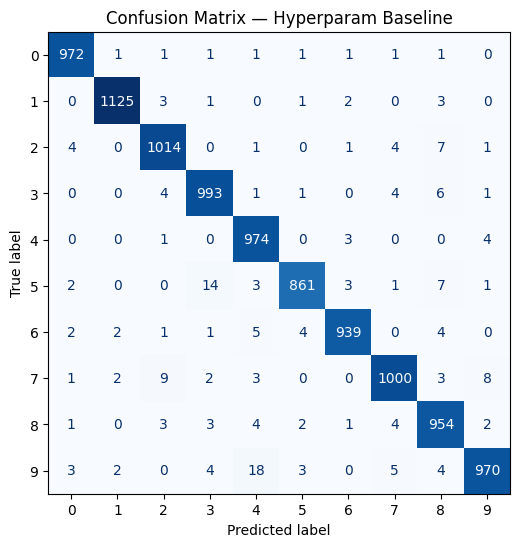

In [27]:
# Confusion matrix for the strongest model so far (choose hp_model here)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict classes on the test set
hp_pred = np.argmax(hp_model.predict(new_test_data, verbose=0), axis=1)
true = np.argmax(new_test_target, axis=1)

cm = confusion_matrix(true, hp_pred)
print(cm)

fig, ax = plt.subplots(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title('Confusion Matrix — Hyperparam Baseline')
plt.show()